In [28]:
library(tidyverse)
library(cowplot)
theme_set(theme_cowplot())

In [29]:
source("../color_df.R")

Q <- read_delim("../data/admix/v5_LR_thin1M.5.Q", delim = " ", col_names = FALSE)
pops <- read_delim("../data/vcf/til11/filtered/til11_LR_filtered.key", delim = " ", col_names = "JRIAL_ID")
key  <- read_delim("../pop_key", delim = "\t", col_names = TRUE)

Q_df <- bind_cols(Q, pops) %>% 
    left_join(., key, by = "JRIAL_ID")  %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop)) %>% 
    filter(!geo %in% c("random", "random2_Palmar_Chico", "random1_Palmar_Chico"))

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double()
)
Parsed with column specification:
cols(
  JRIAL_ID = col_character()
)
Parsed with column specification:
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_logical()
)
Parsed with column specification:
cols(
  pop_id = col_character(),
  species = col_character(),
  JRIAL_ID = col_character(),
  geo = col_character()
)


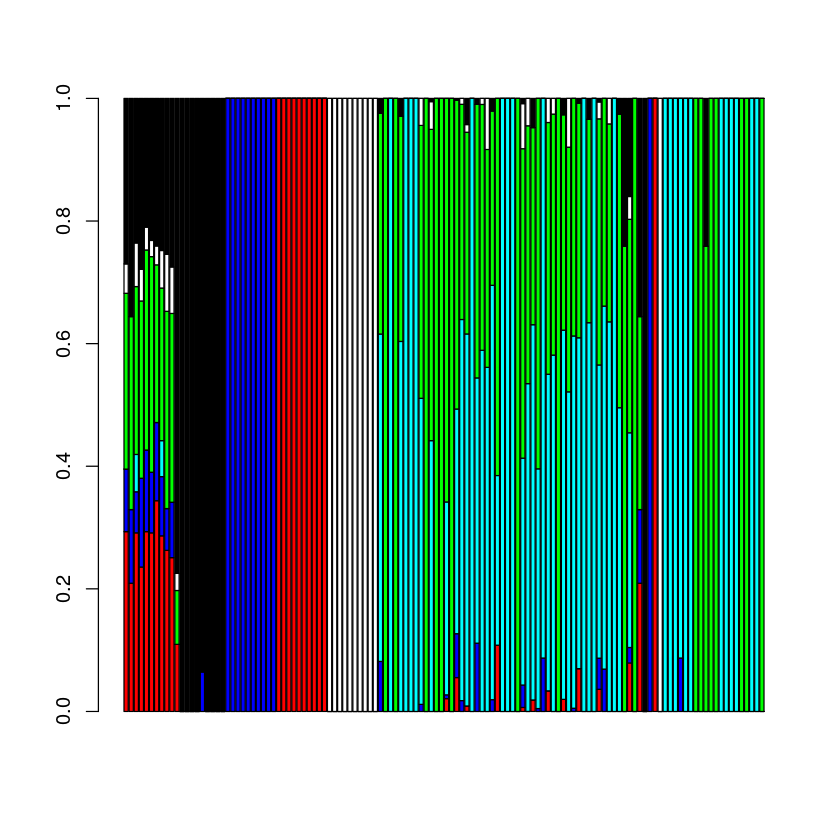

In [32]:
source("../color_df.R")

Q <- read_delim("../ngsadmix_til11_teo.qopt", delim = " ", col_names = FALSE) %>% 
    select(-X7) 
    
key <- read_delim("../pop_key", delim = "\t", col_names = TRUE) %>% 
    filter(species == "Teo") %>% 
    select(JRIAL_ID, geo) %>% 
    distinct()

Q_df <- 
    bind_cols(Q, key) %>% 
    #left_join(., key, by = "JRIAL_ID")  %>% 
    pivot_longer(cols = starts_with("X"), names_to = "bin", values_to = "prop") %>% 
    arrange(geo, desc(prop)) %>% 
    filter(!geo %in% c("random", "random2_Palmar_Chico", "random1_Palmar_Chico"))


In [25]:
color_key <- 
full_join(
    color_df %>% 
    rename("geo" = "pop") %>% 
    mutate(geo = str_remove(geo, "LR_"),
           geo = str_remove(geo, "Teo_")
          ) %>%
    distinct(),
    
    Q_df %>% 
    group_by(geo, bin) %>%
    summarise(mean_p = mean(prop)) %>% 
    arrange(geo, desc(mean_p)) %>% 
    slice(1)
) %>% 
    select(-geo)

#Q_df  <-  Q_df %>% 
#            full_join(., color_key, by = c("bin")) %>%
#            arrange(JRIAL_ID, mean_p)


`summarise()` regrouping output by 'geo' (override with `.groups` argument)
Joining, by = "geo"


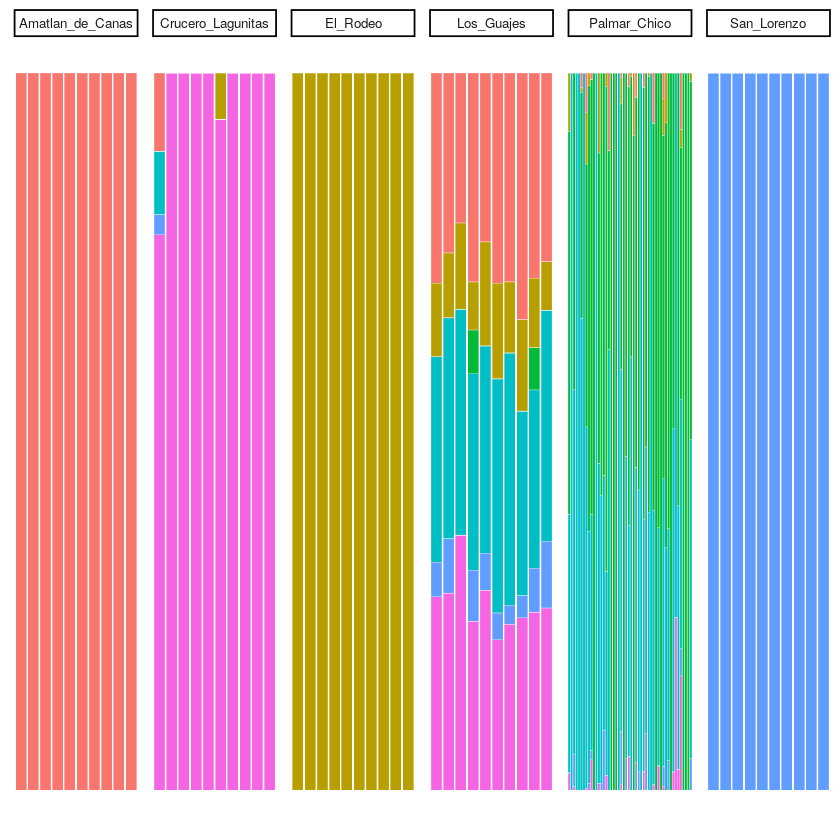

In [27]:
Q_df %>%
    ggplot(aes(JRIAL_ID, prop, fill = bin)) +
    geom_bar(position="stack", stat="identity", colour = "white", lwd = 0.1) +
    facet_wrap(~geo, scales = "free", nrow = 1) +
    theme_classic() +
    theme(
        strip.text.x = element_text(size = 8),
        legend.position = "n",
        line = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    ) 